# Smoke detection project

It is estimated that if every home had working smoke alarms, U.S. residential fire deaths could drop by 36%, with nearly 1100 lives saved per year. The number of false fire alarms is increasing continuously, which is a severe issue for firefighters.

## Data description

All credit regarding the data and relevant information about the problem goes to [Stefan Blattmann](https://github.com/Blatts01) through his [original project](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

The data was colected via a series of sensors, across different controled scenarios:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity
* etc.

The following metrics correspond to one or more columns on the data set:

* UTC: Timestamp UTC seconds
* Air Temperature (Celsius)
* Air Humidity
* TVOC: Total Volatile Organic Compounds; measured in parts per billion [(Source)](https://en.wikipedia.org/wiki/Volatile_organic_compound)
* eCO2: CO2 equivalent concentration; calculated from different values like TVCO
* Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.) [(Source)](https://en.wikipedia.org/wiki/Hydrogen)
* Raw Ethanol: raw ethanol gas [(Source)](https://en.wikipedia.org/wiki/Ethanol)
* Air Pressure
* PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* CNT: Sample counter
* Fire Alarm: ground truth is "1" if a fire is there

Source: https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6

## Import data

In [1]:
# Import libraries
import pandas as pd

df = pd.read_csv('smoke_detection_iot.csv', index_col=0)

# Check number of rows and columns and compare to dataset from terminal
print(df.shape)

(62630, 15)


The use of spaces, brackets and the percentage symbol in column names can cause difficulties when analyzing data. Thus, we will change these names.

In [2]:
# Check col names
print('Old names:')
print(df.columns)

# Rename columns
df.rename(columns = {'Temperature[C]': 'temperature_C',
                     'Humidity[%]': 'humidity', 
                     'TVOC[ppb]': 'TVOC_ppb',
                     'eCO2[ppm]': 'CO2_ppm', 
                     'Raw H2': 'raw_H2', 
                     'Raw Ethanol': 'raw_ethanol', 
                     'Pressure[hPa]': 'pressure_hPA', 
                     'Fire Alarm': 'fire'},
          inplace = True)

print('New names:')
print(df.columns)

Old names:
Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')
New names:
Index(['UTC', 'temperature_C', 'humidity', 'TVOC_ppb', 'CO2_ppm', 'raw_H2',
       'raw_ethanol', 'pressure_hPA', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'fire'],
      dtype='object')


In [3]:
# Checking if all columns are numeric
df.dtypes

UTC                int64
temperature_C    float64
humidity         float64
TVOC_ppb           int64
CO2_ppm            int64
raw_H2             int64
raw_ethanol        int64
pressure_hPA     float64
PM1.0            float64
PM2.5            float64
NC0.5            float64
NC1.0            float64
NC2.5            float64
CNT                int64
fire               int64
dtype: object

In [4]:
# This gives an overview of the data, summarizing each column to obtain important statistics.
print(df.describe())

                UTC  temperature_C      humidity      TVOC_ppb       CO2_ppm  \
count  6.263000e+04   62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09      15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05      14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09     -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09      10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09      20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09      25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09      59.930000     75.200000  60000.000000  60000.000000   

             raw_H2   raw_ethanol  pressure_hPA         PM1.0         PM2.5  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912    938.627649    100.594309    184.467770   
std      272.464305    609.513156      1.3

If we group and count the `CNT` variable, we can see that there are 24994 unique values, ranging from 2 to 5 occurrences each. We cannot be really sure of what this variable represents. We would expect a smaller number of values if this represented different experimental trials or scenarios, and with larger counts. Because this variable is not very informative, it will be removed from the data set.

In [5]:
# Count unique values in a series
df['CNT'].value_counts()

0        5
84       5
190      5
443      5
222      5
        ..
14326    2
16375    2
18424    2
20473    2
10008    2
Name: CNT, Length: 24994, dtype: int64

In [6]:
df.drop(columns=['CNT'], inplace = True)

In [7]:
# Lets see some actual sample data
df.sample(10).head(10)

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,fire
41099,1654777448,27.080,47.35,1151,400,12884,19446,938.754,1.89,1.96,13.02,2.030,0.046,1
18250,1654751581,19.239,48.87,1201,400,12909,19425,938.708,1.95,2.03,13.43,2.094,0.047,1
19424,1654752755,20.151,52.90,1174,400,12922,19424,938.678,1.71,1.78,11.77,1.836,0.041,1
59529,1655126951,11.889,47.47,149,431,12774,20574,937.347,1.83,1.90,12.61,1.966,0.044,0
39768,1654776117,26.850,47.94,1122,456,12867,19450,938.853,2.05,2.13,14.12,2.202,0.050,1
41262,1654777611,26.570,49.24,1140,400,12893,19456,938.762,1.78,1.85,12.27,1.913,0.043,1
26511,1654762860,15.550,54.84,17,400,13103,19999,939.677,0.48,0.50,3.30,0.514,0.012,0
47535,1654783884,24.720,52.70,1327,404,12967,19397,938.771,1.91,1.98,13.11,2.045,0.046,1
24762,1654758093,8.731,53.08,1331,412,12982,19394,938.835,1.81,1.89,12.49,1.948,0.044,1
58363,1655125785,-7.287,41.59,81,400,12789,20639,937.433,2.01,2.09,13.83,2.157,0.049,0


In [8]:
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,fire
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [9]:
df.tail()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,fire
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,0


This data set in particular has no missing data nor strange values (such as a character in a numeric column). However, this is not a common situation. Most of the time, the data is messy and needs to be cleaned.

In [10]:
# Null x non-null
df.isnull().sum()

# There is no missing data

UTC              0
temperature_C    0
humidity         0
TVOC_ppb         0
CO2_ppm          0
raw_H2           0
raw_ethanol      0
pressure_hPA     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
fire             0
dtype: int64

In [11]:
# Checking if the target variable is balanced. The number of positives is a lot larger than the negatives.
df['fire'].value_counts()

1    44757
0    17873
Name: fire, dtype: int64

If we look at the attributes' means for fire and non-fire, we can have an idea of how these attributes change and which ones are most impacted.

However, the first two attributes that we can see are not what one would expect. The mean temperature is lower and the humidity is higher when *there is* fire. One reason could be that the days chosen to do the experiments differed in temperature and humidity, and in some days the fire was lit for longer than in others. Nevertheless, this may indicate a flaw in the experiment. Ideally, the conditions should be standardized across trials and the outside conditions could have been monitored as well, allowing us to correct such differences between days/trails.

The second insight is that `TVOC_ppb`, `CO2_ppm`, `PM`, and `NC` show very distinct means between groups (fire and non-fire), thus these could be important attributes to add to the model.

In [12]:
# Seeing how the attributes' means differ from fire to non-fire
df.groupby('fire').mean()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
fire,,,,,,,,,,,,,
0,1.654860e+09,19.694803,42.930077,4596.587255,962.587255,12896.316847,20082.823533,938.101383,261.982706,450.034639,1356.283816,493.872027,178.982259
1,1.654765e+09,14.483152,50.779534,882.013071,553.189356,12960.878053,19623.050428,938.837806,36.146406,78.417842,146.111337,87.665549,40.541627


## Visualizations

The use of visualization can provide a great understanding of the features and their relationship with the target variable in a data set.

### Correlation between variables

First, we will check the correlation between all variables in the data set.

For this, we will use three methods available on Pandas' `corr` function:

* Pearson: a simple correlation statistic to measure the degree of the relationship between variables. It assumes that the variables are *linearly* related.

* Kendall: the Kendall rank correlation coefficient is a statistic used to measure the ordinal association between two measured quantities. It can be used on continuous and ordinal data. A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient.

* Spearman: Spearman's rank corelation is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It is nonparametric, thus it does not rely on normality, and also works with ordinal variables. It assesses how well the relationship between two variables can be described using a monotonic function.

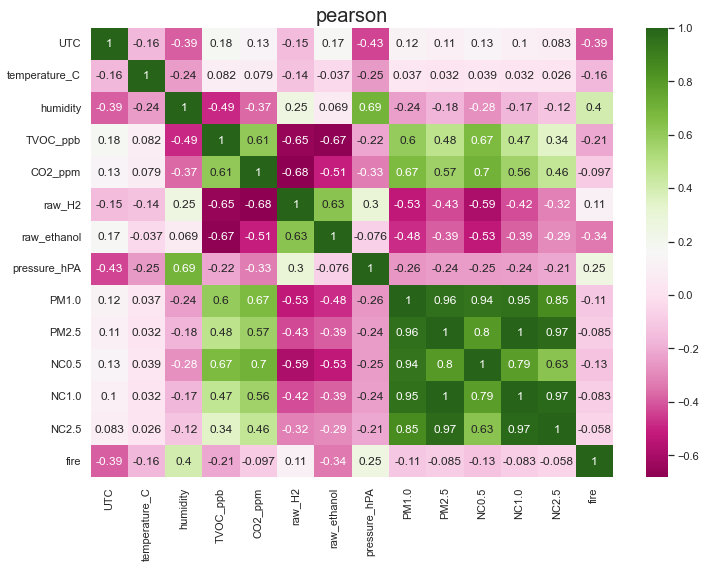

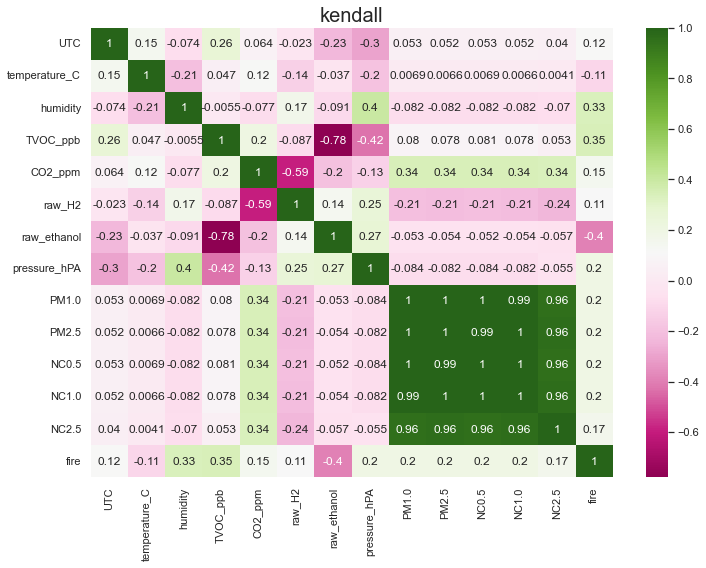

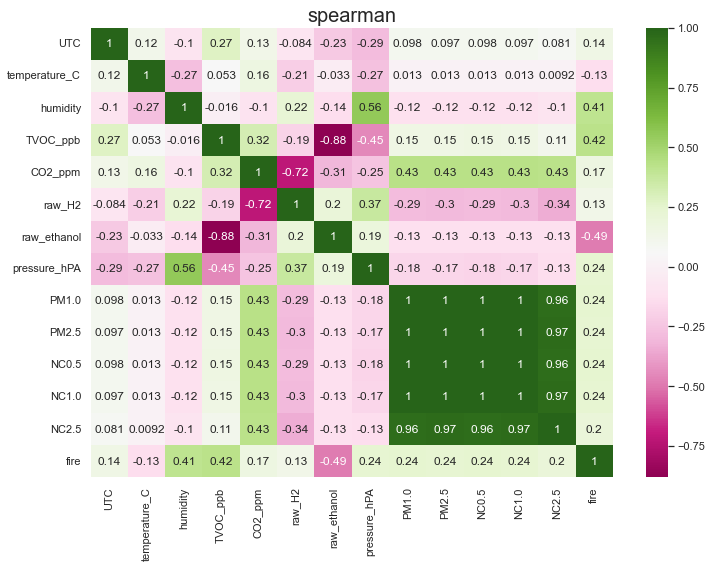

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define plot size
#plt.rcParams["figure.figsize"]=10,10

# Correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in ['pearson', 'kendall', 'spearman']:
    plt.figure()
    sns.heatmap(df.corr(method = i), annot = True, cmap="PiYG").set_title(i, fontsize = 20)

Looking at the heatmaps, the most correlated (|cor| > 0.8) attributes seem to be: TVOC with raw ethanol; CO2 with raw H2; and all PMs and NCs with each other. Next, we will plot these attributes to observe how they relate to one another.

<AxesSubplot: xlabel='CO2_ppm', ylabel='raw_H2'>

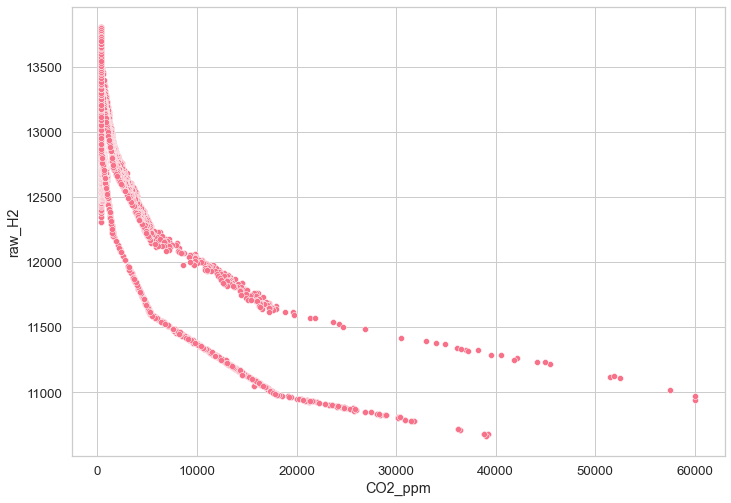

In [22]:
sns.set_theme(style="whitegrid", palette="husl", font_scale=1.2)

sns.scatterplot(data = df, x = 'CO2_ppm', y = 'raw_H2')

<AxesSubplot: xlabel='TVOC_ppb', ylabel='raw_ethanol'>

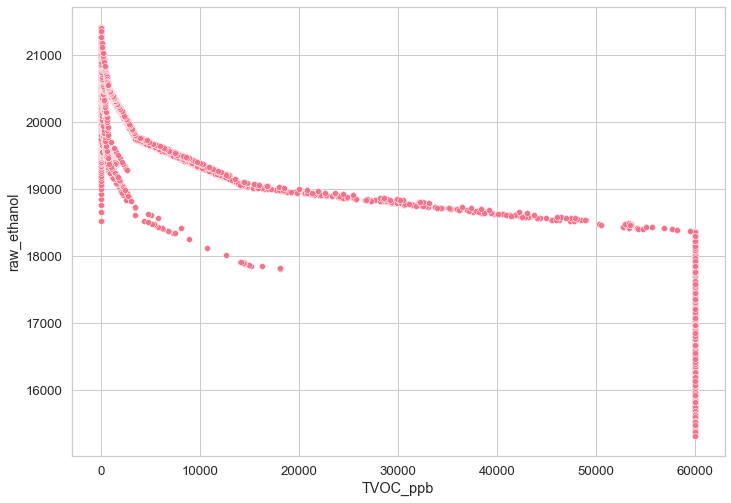

In [23]:
sns.scatterplot(data = df, x = 'TVOC_ppb', y = 'raw_ethanol')

The plots above show the relation between two pairs of correlated variables. In each of them, we could draw two tendency lines. This may be due to the different fire scenarios simulated for data collection.

[Text(0, 0, '17873'), Text(0, 0, '44757')]

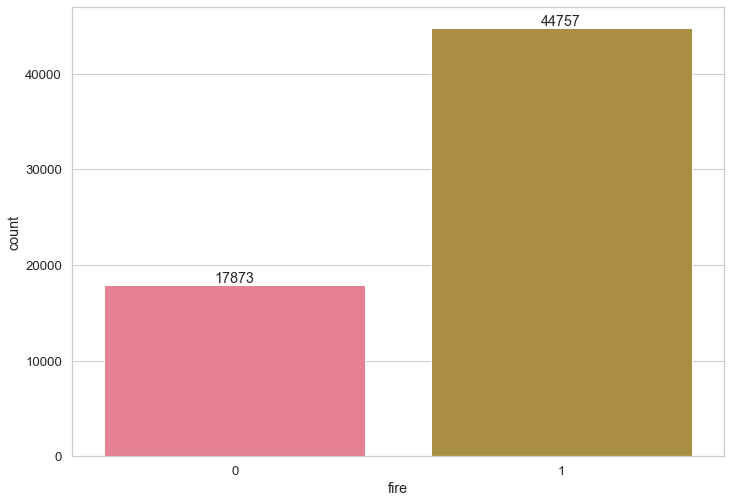

In [25]:
# Plot the number of fire vs non-fire
cp = sns.countplot(data = df, x = 'fire')

cp.bar_label(cp.containers[0])

In the plot above we can see that the target variable is not balanced, which means that the accuracy is not the best evaluation metric to be used here.

<AxesSubplot: xlabel='UTC', ylabel='fire'>

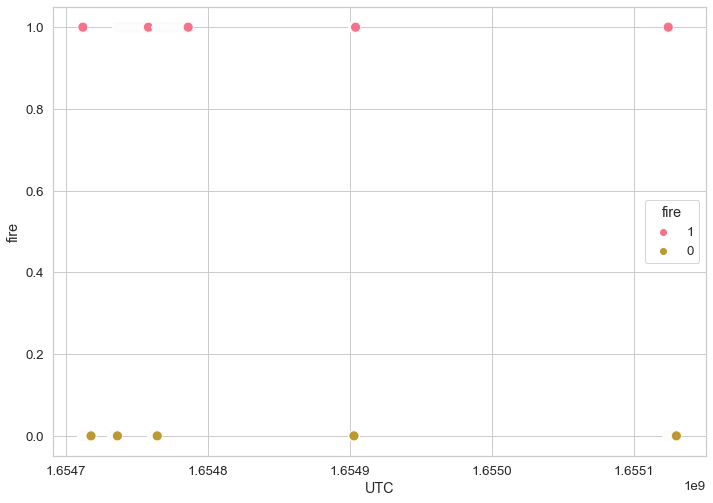

In [26]:
sns.scatterplot(data = df, x = 'UTC', y = 'fire', hue = 'fire', hue_order = [1,0], s=100)

# This plot indicates that data collection was probably performed in different days, and thus
# the UTC series contains wide gaps

The plot above indicates that data collection was probably performed for short periods of time in different days, and thus we see only a few points on the plot. Next, we will convert the UTC series to datetime, which may help us visualize better this variable.

## Working with time series

In our data, we have time represented by Unix time (also known as Epoch time or Posix time), which corresponds to the number of seconds that have elapsed since the Unix epoch, 00:00:00 UTC (Coordinated Universal Time) on 1st January 1970. 

Although this is a standardised measure of time, it is not very intuitive for humans to interpret. Thus, we will extract other information (such as dates and hours). Since we can not be sure of the time zone in which data was collected, we will extract the information in local time, keeping in mind it is not the actual time when the data was collected.

In [30]:
# We will convert UTC time to datetime to make data more comprehensible 

from datetime import datetime
df['datetime'] = pd.to_datetime(df['UTC'],unit='s')
df['day'] = pd.to_datetime(df['UTC'],unit='s').dt.day
df['time'] = pd.to_datetime(df['UTC'],unit='s').dt.hour

print(df[['UTC','datetime','day','time']].head)

<bound method NDFrame.head of               UTC            datetime  day  time
0      1654733331 2022-06-09 00:08:51    9     0
1      1654733332 2022-06-09 00:08:52    9     0
2      1654733333 2022-06-09 00:08:53    9     0
3      1654733334 2022-06-09 00:08:54    9     0
4      1654733335 2022-06-09 00:08:55    9     0
...           ...                 ...  ...   ...
62625  1655130047 2022-06-13 14:20:47   13    14
62626  1655130048 2022-06-13 14:20:48   13    14
62627  1655130049 2022-06-13 14:20:49   13    14
62628  1655130050 2022-06-13 14:20:50   13    14
62629  1655130051 2022-06-13 14:20:51   13    14

[62630 rows x 4 columns]>


If we plot the variables day and time we can see more points than in the last plot. And if we plotted the hours vs the seconds of the day for each day separatedly we would be able to see even more details. For now, we can suppose that the data collection was performed on different times and with different durations for each day, which could interfere on the results, since different times of the day have different humidities, temperatures, and so on. A better research outline would systematically account for these factors.

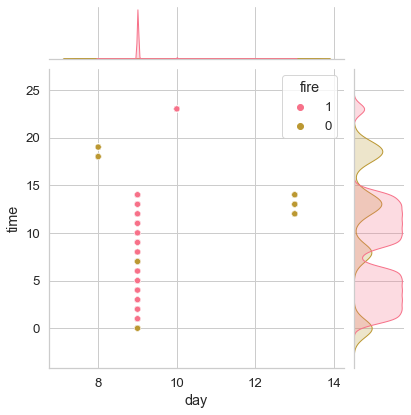

In [33]:
sns.jointplot(data = df, x = 'day', y = 'time', hue='fire', hue_order = [1,0])

## Feature extraction and model training

We will compare two algoithms: logistic regression and decision tree.

Before building the models, we will choose which attributes should be included and check if they need pre-processing.

We saw previously that the attributes PM and NC are highly correlated. According to the description of the data set, we cannot be really sure what the PM attributes are, so it might be a good idea not to use them.

The hour of the day is probably an important feature to predict fire in the real world, since there is a higher chance of a domestic accident occuring during lunch or dinner hours. However, the data set we are using was created artificially, and thus this variable may not reflect real life.

Lastly, since our data set does not have a huge number of attributes, we will not be using any tools for feature selection, such as [Recursive Feature Elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [34]:
# Removing extra columns from data set and separating train and test sets

from sklearn.model_selection import train_test_split

# Remove columns
cols_to_remove = ['UTC', 'datetime', 'day', 'time']
df_vars = df.drop(cols_to_remove, axis = 1)

# Separate attributes and target
X = df_vars.loc[:, df_vars.columns != 'fire']
y = df_vars.loc[:, df_vars.columns == 'fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Logistic regression

Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

First, we will fit a simple logistic regression model with all the attributes and take a few metrics to evaluate its performance.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

logreg = LogisticRegression()
y_train = y_train.values.ravel()
# .values will give the values in a numpy array (shape: (n,1))
# .ravel will convert that array shape to (n, ) (i.e. flatten it)

# Train model
logreg.fit(X_train, y_train)

# Predict new data
predictions = logreg.predict(X_test)

# Quick evaluation of the model
score = logreg.score(X_test, y_test)
print('Accuracy:',score)

roc_auc = roc_auc_score(y_test, predictions)
print('ROC-AUC:',roc_auc)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.8844004470700942
ROC-AUC: 0.8109741059721771
            Predict Fire  Predict Not Fire
True Fire           3456              1967
False Fire           205             13161


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The metrics obtained in this first model were actually pretty good. We will try to make it even better.

We received a convergence warning, suggesting us to increase the number of iterations or scale the data, which will be done in the next steps.

We saw earlier that the attributes PM1.0, PM2.5, NC0.5, NC1.0, and NC2.5 are highly correlated with each other. From these, we will only include NC2.5 in our model, which is the number of particles in the air with size 1.0 µm < 2.5 µm. We are assuming that in a scenario where we would build a new smoke detector, it would be easier to find an equipment that is able to detected larger particles.

In [42]:
# Reducing the number of attributes
# TVOC with raw ethanol; CO2 with raw H2
X_train2 = X_train.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)
X_test2 = X_test.drop(['PM1.0','PM2.5', 'NC1.0', 'NC0.5'], axis = 1)

logreg = LogisticRegression()
logreg.fit(X_train2, y_train)
predictions2 = logreg.predict(X_test2)

score2 = logreg.score(X_test2, y_test)
print('Accuracy before attribute reduction:', round(score, 4))
print('Accuracy after attribute reduction:', round(score2, 4))

roc_auc2 = roc_auc_score(y_test, predictions2)
print('ROC-AUC before attribute reduction:', round(roc_auc, 4))
print('ROC-AUC after attribute reduction:', round(roc_auc2, 4))

ConfM2 = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions2),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM2)

Accuracy before attribute reduction: 0.8844
Accuracy after attribute reduction: 0.8859
ROC-AUC before attribute reduction: 0.811
ROC-AUC after attribute reduction: 0.8118
            Predict Fire  Predict Not Fire
True Fire           3451              1972
False Fire           171             13195


/Users/alanaselli/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that removing the attributes 'PM1.0', 'PM2.5', 'NC1.0', and 'NC0.5' slightly improved the accuracy and ROC-AUC. Even though it is not a large improvement, using less attributes usually means less computational time and capacity needed, besides simpler data collection. Next, we will apply feature scaling and see if we get better results.

### Feature scaling

Some Machine Learning algorithms require feature scaling. That could be for several reasons: linear/logistic regression and neural network, for example, use gradient descent as an optimization technique, and differences in ranges of features will cause different step sizes for each feature. Distance-based algorithms such as KNN, K-means, and SVM use distances between data points to determine their similarity. In this case, different scales may result in higher weightage given to features with higher magnitude. On the other hand, tree-based algorithms are fairly insensitive to the scale of the features, since they ae only splitting a node based on a single feature. In other words, this type of algorithm does not "mix" features.

**Standardization** is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation, and the values are not restricted to a particular range. Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Since standardization does not have a bounding range, even if you have outliers in your data, they will not be affected by standardization.

<center>$X' = \frac{X - \mu}{\sigma}$</center>

**Normalization** is another scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$</center>

In [43]:
# Normalizing the data

from sklearn import preprocessing

X_normalized = preprocessing.normalize(X_train2, norm='l2')
X_test_normalized = preprocessing.normalize(X_test2, norm='l2')

logreg = LogisticRegression()
logreg.fit(X_normalized, y_train)
predictions_normalized = logreg.predict(X_test_normalized)

score_normalized = logreg.score(X_test_normalized, y_test)
print('Accuracy before normalization:', round(score2, 4))
print('Accuracy after normalization:', round(score_normalized, 4))

roc_auc_normalized = roc_auc_score(y_test, predictions_normalized)
print('ROC-AUC before normalization:', round(roc_auc2, 4))
print('ROC-AUC after normalization:', round(roc_auc_normalized, 4))

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions_normalized),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy before normalization: 0.8859
Accuracy after normalization: 0.8657
ROC-AUC before normalization: 0.8118
ROC-AUC after normalization: 0.7684
            Predict Fire  Predict Not Fire
True Fire           2918              2505
False Fire            18             13348


After normalizing the data, we got worse results.

In [45]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train2)
X_scaled = scaler.transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

logreg = LogisticRegression()
logreg.fit(X_scaled, y_train)
predictions_scaled = logreg.predict(X_test_scaled)

score_scaled = logreg.score(X_test_scaled, y_test)
print('Accuracy before standadization:', round(score2, 4))
print('Accuracy after standadization:', round(score_scaled, 4))

roc_auc_scaled = roc_auc_score(y_test, predictions_scaled)
print('ROC-AUC before standadization:', round(roc_auc2, 4))
print('ROC-AUC after standadization:', round(roc_auc_scaled, 4))

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions_scaled),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy before standadization: 0.8859
Accuracy after standadization: 0.8982
ROC-AUC before standadization: 0.8118
ROC-AUC after standadization: 0.8587
            Predict Fire  Predict Not Fire
True Fire           4150              1273
False Fire           639             12727


The accuracy and ROC-AUC increased after standardizing the data, thus we will continue with the scaled data.

### Model evaluation

Below is a summary of the most used metrics to evaluate Machine Learning classification models.

**Accuracy:** (TP + TN) / (TP + TN + FP + FN)

Accuracy is used to calculate the proportion of the total number of predictions that were correct. While being intuitive, the accuracy metric heavily relies on data specifics. If the dataset is imbalanced (the classes in a set are presented unevenly), the result won’t be something you can trust.

**Recall / Sensitivity / True Positive Rate:** TP / (TP + FN)

Recall is the probability that an actual positive will test positive. It is used in a case where it is critical to not miss the positives, even if it means increasing the number of false positives. For example: classification of sick versus healthy patients.

**Specificity / False Positive Rate:** TN / (TN + FP)

The fraction of all negative instances *incorrectly identified as positive*. Specificity is basically the opposite of recall.

**Precision:** TP / (TP + FP)

The fraction of positive predictions that are correct. Precision does well in cases when it is more important to *avoid False Positves* than False Negatives. A typical example of this is a spam detector model. It’s kind of okay if the model sends a couple of spam letters to the inbox, but sending an important non-spam email to the spam folder (False Positive) is much worse.

**F1 Score:** 2TP / (2TP + FP + FN)

The F1 Score tries to find the balance between precision and recall by calculating their harmonic mean. It is a measure of a test’s accuracy where the highest possible value is 1. This indicates perfect precision and recall.

**AUC-ROC:** The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The Area Under the Curve (AUC) represents the degree or measure of separability. When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.

Let's check how well our model does considering each metric.

In [46]:
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score

accuracy_lr = logreg.score(X_test_scaled, y_test)
print('Accuracy:',accuracy_lr)

recall_lr = recall_score(y_test, predictions_scaled)
print('Recall:',recall_lr)

f1_lr = f1_score(y_test, predictions_scaled)
print('F1:',f1_lr)

precision_lr = precision_score(y_test, predictions_scaled)
print('Precision:',precision_lr)

roc_auc_lr = roc_auc_score(y_test, predictions_scaled)
print('ROC-AUC:',roc_auc_lr)

Accuracy: 0.898238330938315
Recall: 0.952192129283256
F1: 0.930132280932544
Precision: 0.9090714285714285
ROC-AUC: 0.858725605486179


It is crucial to choose the most appropriate metrics to evaluate a model, considering the given problem we are trying to solve. In our case, it is very important to not miss any true positives (recall), and secondly, we should try to minimize the false positives since we don't want a fire alarm going off all the time (pecision). In this situation, the AUC-ROC is an excellent metric to use, while attributing a larger 'weight' on recall. Our logistic regression model achieved an AUC-ROC very close to 1, which is an almost perfect performance. Further ahead we should discuss some factors that contribute for this great performance.

Text(0.5, 1.0, 'ROC curve')

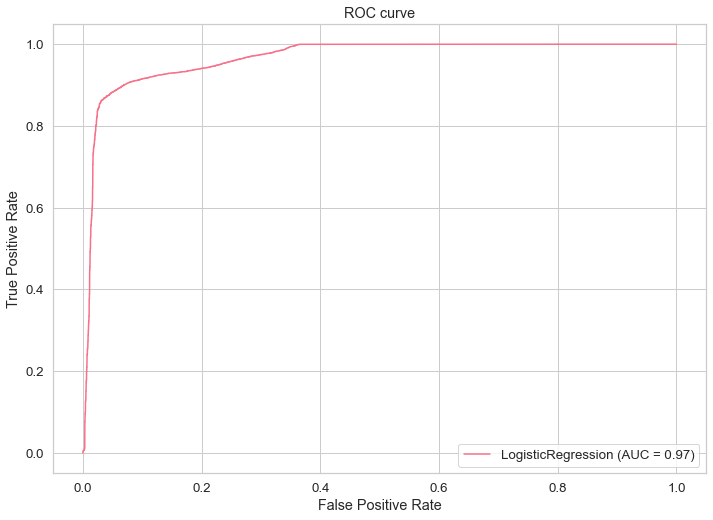

In [47]:
metrics.plot_roc_curve(logreg, X_test_scaled, y_test)
plt.title("ROC curve")

### Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

A Decision Tree can be represented by a flowchart, where the decision nodes are conditions that split the data into branches, and each leaf-node contains a prediction. The root (first node) is at the top, while the leaf-nodes 'grow' towards the bottom.

The decision tree has many advantages: it is easy to interpret and is completely transparent, it does not usually require feature scaling, and can use both numeric and categorical features. On the other hand, decision tree models tend to overfit the data, and can become complex with the increasing number of layers and decision labels. The overfitting problem can be addressed by pruning the tree (adjusting parameters to limit the 'size' of the tree) or using the Random Forest algorithm, which combines the predictions of multiple decision trees. However, we will not use Random Forests in this project.

In [48]:
from sklearn import tree

# The parameter max_depth=3 will limit the size of the tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
clf = clf.fit(X_train2, y_train)
pred = clf.predict(X_test2)

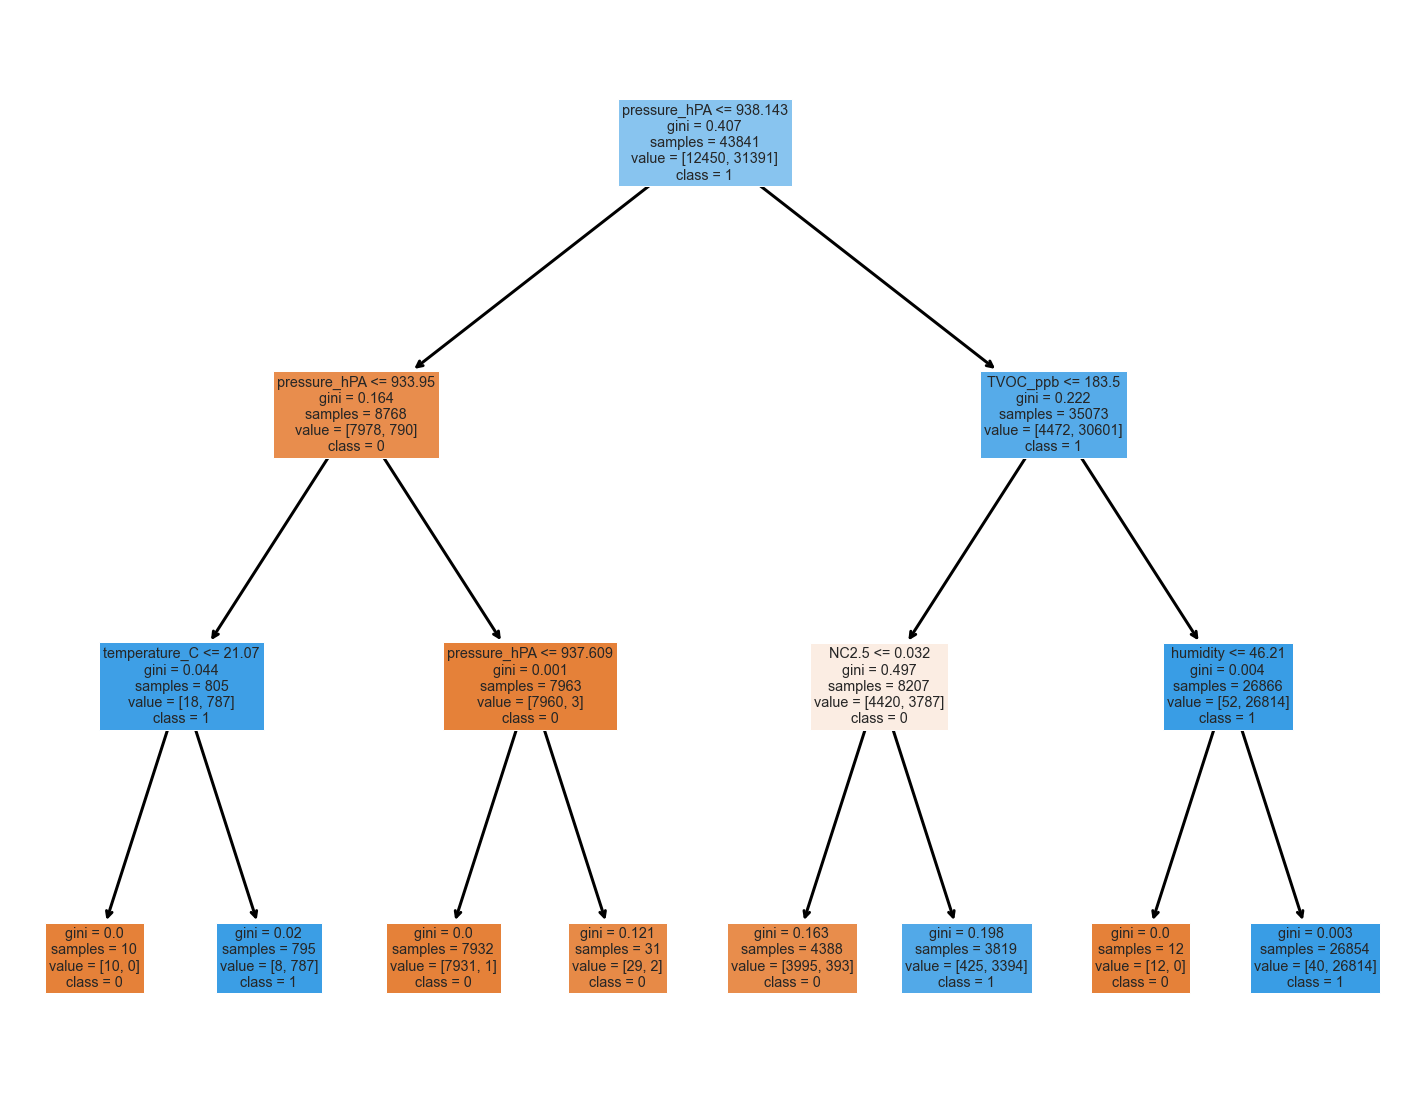

In [49]:
fig = plt.figure(figsize=(25,20))
out = tree.plot_tree(clf, 
               feature_names=X_train2.columns,  
               class_names=['0','1'],
               filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

In the image above we can see that the first attribute used to split the data is `pressure_hPA`, which results in two leaf-nodes with gini indexes of 0.164 and 0.222. The closer to 0, the better the classes are separated. Next, the algorithm uses the attributes `pressure_hPA` and `TVOC_ppb`. The resulting leaf-nodes present lower gini indexes (except for one), which means that the probability of missclassification is low and there is a good segregation of the data. Taking a look at the root, we can see that `gini = 0.407` (the maximum would be 0.5), which indicates a good distribution of classes and therefore a good training set.

In [50]:
accuracy_dt = clf.score(X_test2, y_test)
print('Accuracy:',accuracy_dt)

recall_dt = recall_score(y_test, pred)
print('Recall:',recall_dt)

f1_dt = f1_score(y_test, pred)
print('F1:',f1_dt)

precision_dt = precision_score(y_test, pred)
print('Precision:',precision_dt)

roc_auc_dt = roc_auc_score(y_test, pred)
print('ROC-AUC:',roc_auc_dt)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy: 0.9817446378200011
Recall: 0.9874307945533443
F1: 0.9871722951494072
Precision: 0.986913931055111
ROC-AUC: 0.977580416638649
            Predict Fire  Predict Not Fire
True Fire           3456              1967
False Fire           205             13161


The metrics of the DT model are better than those of the logistic regression. Next, we will change the `max_depth` parameter and see if we get even better results.

In [51]:
clf2 = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
clf2 = clf2.fit(X_train2, y_train)
pred2 = clf2.predict(X_test2)

In [55]:
accuracy_dt2 = clf2.score(X_test2, y_test)
print('Accuracy with max_depth=3:',accuracy_dt)
print('Accuracy with max_depth=5:',accuracy_dt2)

recall_dt2 = recall_score(y_test, pred2)
print('Recall with max_depth=3:',recall_dt)
print('Recall with max_depth=5:',recall_dt2)

f1_dt2 = f1_score(y_test, pred2)
print('F1 with max_depth=3:',f1_dt)
print('F1 with max_depth=5:',f1_dt2)

precision_dt2 = precision_score(y_test, pred2)
print('Precision with max_depth=3:',precision_dt)
print('Precision with max_depth=5:',precision_dt2)

roc_auc_dt2 = roc_auc_score(y_test, pred2)
print('ROC-AUC with max_depth=3:',roc_auc_dt)
print('ROC-AUC with max_depth=5:',roc_auc_dt2)

ConfM = pd.DataFrame(
    metrics.confusion_matrix(y_test, predictions),
    columns = ['Predict Fire','Predict Not Fire'],
    index = ['True Fire','False Fire'])
print(ConfM)

Accuracy with max_depth=3: 0.9817446378200011
Accuracy with max_depth=5: 0.9951567406461227
Recall with max_depth=3: 0.9874307945533443
Recall with max_depth=5: 0.9937902139757594
F1 with max_depth=3: 0.9871722951494072
F1 with max_depth=5: 0.9965862625201636
Precision with max_depth=3: 0.986913931055111
Precision with max_depth=5: 0.9993980889323603
ROC-AUC with max_depth=3: 0.977580416638649
ROC-AUC with max_depth=5: 0.9961575078729986
            Predict Fire  Predict Not Fire
True Fire           3456              1967
False Fire           205             13161


These last metrics are way better then the logistic regression model's. However, we can see that the model increased in complexity. There are other changes we could do to try and get a better DT model, such as reducing the number of features. For now, we will comapare our final metrics and discuss them.

In [58]:
data = {'Accuracy': [accuracy_lr, accuracy_dt2],
        'Recall': [recall_lr, recall_dt2],
        'F1': [f1_lr, f1_dt2],
        'Precision': [precision_lr, precision_dt2],
        'ROC-AUC': [roc_auc_lr, roc_auc_dt2]}

compare_models = pd.DataFrame(data=data, index=['Logistic Regression', 'Decision Tree'])
compare_models

,Accuracy,Recall,F1,Precision,ROC-AUC
Logistic Regression,0.898238,0.952192,0.930132,0.909071,0.858726
Decision Tree,0.995157,0.993790,0.996586,0.999398,0.996158


The Logistic Regression model was not bad, but the Decision Tree was excellent. However, we should note that the Decision Tree is an algorithm that tends to overfit. Considering the importance of fire detection for people's safety, in the real world it would be crucial to reevaluate the model with different data sources.

# References
 
Agrawal, Sumeet Kumar. **Metrics to Evaluate your Classification Model to take the right decisions.** July 20, 2021. [Link](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/)

Bhandari, Aniruddha. **Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization.** June 15, 2022. [Link](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

Coordinated Universal Time. **Wikipedia.** [Link](https://en.wikipedia.org/wiki/Coordinated_Universal_Time)

Decision Trees. **SciKit-learn documentation.** [Link](https://scikit-learn.org/stable/modules/tree.html)

Decision tree learning. **Wikipedia**. [Link](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

Navlani, Avinash. **Decision Tree Classification in Python Tutorial.** Dec, 2018. [Link](https://www.datacamp.com/tutorial/decision-tree-classification-python)

LaTeX:Symbols. **AoPSOnline**. [Link](https://artofproblemsolving.com/wiki/index.php/LaTeX:Symbols)

Li, Susan. **Building A Logistic Regression in Python, Step by Step.** Sep 29, 2017. [Link](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

Logistic Regression. **Wikipedia**. [Link](https://en.wikipedia.org/wiki/Logistic_regression#History)

Machine Learning Metrics: How to Measure the Performance of a Machine Learning Model. **Altexsoft.** 16 Jun, 2022. [Link](https://www.altexsoft.com/blog/machine-learning-metrics/)

Narkhede, Sarang. **Understanding AUC - ROC Curve.** Jun 26, 2018. [Link](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

pandas.DataFrame.corr. **Pandas documentation.** [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

Preprocessing data. **SciKit-learn documentation.** [Link](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

Scikit-Learn: Decision Tree Learning I - Entropy, Gini, and Information Gain. **BogoToBogo**. [Link](https://www.bogotobogo.com/python/scikit-learn/scikt_machine_learning_Decision_Tree_Learning_Informatioin_Gain_IG_Impurity_Entropy_Gini_Classification_Error.php)

Shukla, Abhay. **Writing Math Equations in Jupyter Notebook: A Naive Introduction.** Mar 26, 2020. [Link](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)

Unix time. **Wikipedia.** [Link](https://en.wikipedia.org/wiki/Unix_time)